Representations:
* Individual tree
* Trajectory
    * Radii vs. iteration, with summaries such as log-probability, and the marginal likelihoods of various models
    * Include SMIRKS tags for the individual types

In [1]:
from pickle import load
from glob import glob
glob('../bayes_implicit_solvent/rjmc_experiments/elaborate_*gaussian_ll.pkl')

['../bayes_implicit_solvent/rjmc_experiments/elaborate_tree_rjmc_run_n_compounds=160_n_iter=50000_gaussian_ll.pkl',
 '../bayes_implicit_solvent/rjmc_experiments/elaborate_tree_rjmc_run_n_compounds=481_n_iter=15000_gaussian_ll.pkl']

In [2]:
with open('../bayes_implicit_solvent/rjmc_experiments/elaborate_tree_rjmc_run_n_compounds=481_n_iter=15000_gaussian_ll.pkl', 'rb') as f:
    result = load(f)

using the following decorators:
bond_specifiers (replace "~" bonds)
	 ['@', '-', '#', '=', ':']
atomic_specifiers (&'d into atom definitions)
	 ['r0', 'r3', 'r4', 'r5', 'r6', 'r7', '+0', '+1', '+2', 'H0', 'H1', 'H2', 'H3', 'H4', 'X1', 'X2', 'X3', 'X4']
bondable_types (~'d onto atoms)
	 ['[#1]', '[#6]', '[#7]', '[#8]', '[#9]', '[#15]', '[#16]', '[#17]', '[#35]', '[#53]', '[(#7,#8,#9,#16,#17,#35)]', '[r0]', '[r3]', '[r4]', '[r5]', '[r6]', '[r7]', '[+0]', '[+1]', '[+2]', '[H0]', '[H1]', '[H2]', '[H3]', '[H4]', '[X1]', '[X2]', '[X3]', '[X4]']


In [3]:
result.keys()

dict_keys(['traj', 'log_probs', 'log_acceptance_probabilities'])

In [4]:
traj = result['traj']
log_probs = result['log_probs']
log_acceptance_probabilities = result['log_acceptance_probabilities']

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'log probability')

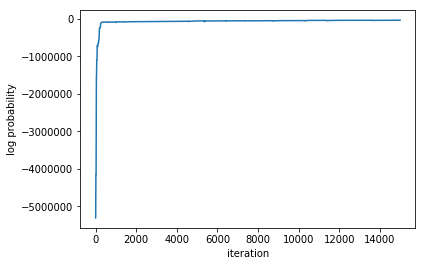

In [6]:
plt.plot(log_probs)
plt.xlabel('iteration')
plt.ylabel('log probability')

Text(0, 0.5, 'log probability')

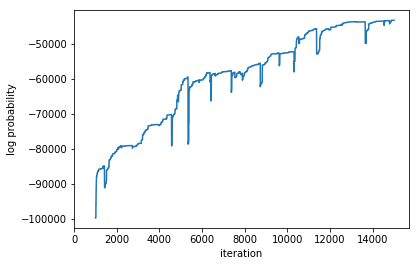

In [7]:
import numpy as np
iterations = np.arange(len(log_probs))
burn_in = 1000
plt.plot(iterations[burn_in:], log_probs[burn_in:])
plt.xlim(0,)
plt.xlabel('iteration')
plt.ylabel('log probability')

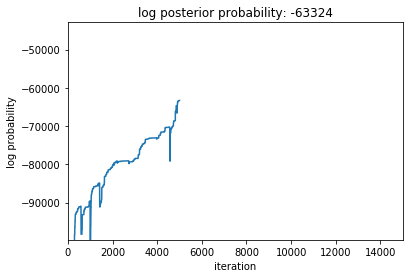

In [8]:
def plot_log_prob(t=1000):
    
    plt.xlim(0, len(log_probs))
    
    #min_t = max(0,t - 500)
    plt.ylim(log_probs[1000], max(log_probs) + np.abs(max(log_probs) * 0.01))
    plt.plot(log_probs[:t])
    plt.xlabel('iteration')
    plt.ylabel('log probability')
    
    plt.title('log posterior probability: {}'.format(int(log_probs[t])))
plot_log_prob(t=5000)

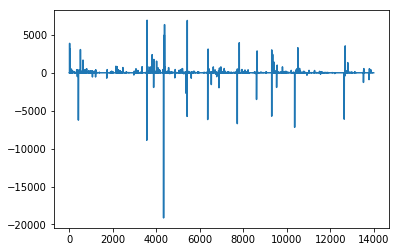

In [9]:
plt.plot(np.diff(log_probs)[burn_in:])

In [10]:
np.sum(np.diff(log_probs)<0)

1563

In [11]:
tree = traj[0]

Text(0.5, 0, 'iteration')

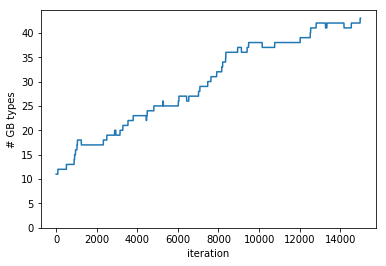

In [12]:
n_types = [tree.number_of_nodes for tree in traj]
plt.plot(n_types)
plt.yticks(list(range(0, max(n_types) + 1))[::5])
plt.ylabel('# GB types')
plt.xlabel('iteration')

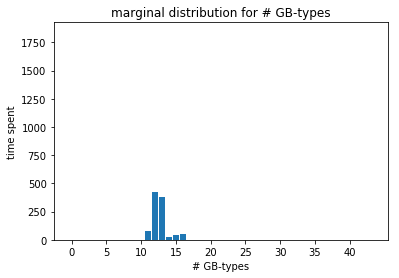

In [13]:
import numpy as np


def plot_running_average_model_evidence(t=1000):
    x = list(range(0, max(n_types) + 1))
    y = np.bincount(n_types[:t], minlength=len(x))
    
    plt.bar(x, y)
    plt.xlabel('# GB-types')
    plt.ylabel('time spent')
    plt.title('marginal distribution for # GB-types')
    
    plt.xticks(list(range(max(n_types) + 1))[::5])
    
    plt.ylim(0,max(np.bincount(n_types)))
plot_running_average_model_evidence()

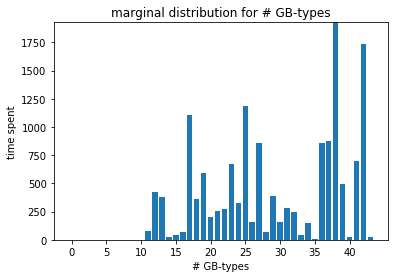

In [14]:
plot_running_average_model_evidence(len(traj))

In [15]:
tree = traj[-1]

In [16]:
from simtk import unit

radii = np.array([tree.get_radius(n) / unit.nanometer for n in tree.ordered_nodes])

In [17]:
list(zip(tree.ordered_nodes, radii))

[('*', 0.21204029233518257),
 ('[#1]', 0.19255654706772168),
 ('[#6]', 0.19224124016953614),
 ('[#7]', 0.22903735294828606),
 ('[#8]', 0.13273817674804592),
 ('[#9]', 0.13998463977511813),
 ('[#15]', 0.10048691343110142),
 ('[#16]', 0.2956471088262678),
 ('[#17]', 0.04812616788986696),
 ('[#35]', 0.1377587651159384),
 ('[#53]', 0.11147909994557957),
 ('[#1]~[r5]', 0.08968460303956263),
 ('[#1]~[r0]', 0.26902580427193323),
 ('[#6]~[#35]', 0.19147300208826687),
 ('[#6]~[#7]', 0.25867189681013153),
 ('[#6]~[r3]', 0.11949802598017492),
 ('[#6]~[#9]', 0.16852845589577845),
 ('[#7&X1]', 0.050524696678338935),
 ('[#8&X2]', 0.18849435344680013),
 ('[#8&r3]', 0.12456293547054537),
 ('[#16]~[X1]', 0.1654138959921596),
 ('[#1]~[r5]~[r7]', 0.09482663089146491),
 ('[#1]~[r0]~[r5]', 0.03424533340123472),
 ('[#1]~[r5]~[#8]', 0.024347861772669524),
 ('[#1]~[r0&H3]', 0.18514892997588633),
 ('[#1]~[r0]~[+1]', 0.26831095654017695),
 ('[#6&H2]~[#35]', 0.25993334791673905),
 ('[#6]~[#7]~[#7]', 0.3173882416

In [18]:
# to assign colors, let's get all of the types every encountered during the simulation
# then put them in lexicographic order, then make a dictionary that indexes into a nice seaborn color palette

In [19]:
all_types = set()
for tree in traj:
    all_types.update(tree.ordered_nodes)
all_types = sorted(list(all_types))

In [20]:
all_types

['*',
 '[#15]',
 '[#15]~[X4]',
 '[#16]',
 '[#16]=[X1]',
 '[#16]~[X1]',
 '[#17]',
 '[#1]',
 '[#1]~[#16]',
 '[#1]~[r0&H3]',
 '[#1]~[r0&H3]~[#9]',
 '[#1]~[r0]',
 '[#1]~[r0]~[+1]',
 '[#1]~[r0]~[r5]',
 '[#1]~[r0]~[r6]~[r5]',
 '[#1]~[r5]',
 '[#1]~[r5]~[#8]',
 '[#1]~[r5]~[r7]',
 '[#35]',
 '[#53]',
 '[#6&H2]~[#35]',
 '[#6&H2]~[r0]~[#35]',
 '[#6&H3]~[#35]',
 '[#6&H3]~[X4]~[#7&+0]',
 '[#6&H3]~[X4]~[#7]',
 '[#6&X3]~[r3]',
 '[#6]',
 '[#6]#[#7]',
 '[#6]-[#7]~[#7]',
 '[#6]-[#7]~[#7]~[X3]',
 '[#6]-[#7]~[X2]~[#7]',
 '[#6]=[#7]',
 '[#6]@[r3]',
 '[#6]~[#35]',
 '[#6]~[#53]',
 '[#6]~[#7&H3]',
 '[#6]~[#7]',
 '[#6]~[#7]~[#7]',
 '[#6]~[#9]',
 '[#6]~[X4&H1]~[#7]',
 '[#6]~[X4&H1]~[H0]~[#7]',
 '[#6]~[X4]~[#7]',
 '[#6]~[X4]~[X4&H1]~[#7]',
 '[#6]~[r3]',
 '[#6]~[r3]~[X2]',
 '[#6]~[r6]-[#7]~[#7]',
 '[#7&X1]',
 '[#7]',
 '[#8&X2]',
 '[#8&r3]',
 '[#8]',
 '[#9]']

In [24]:
len(all_types)

52

In [38]:
import seaborn.apionly as sns
color_list = sns.color_palette(palette="husl", n_colors=len(all_types))
color_list = color_list[5:] + color_list[:5]
color_dict = dict(zip(all_types, color_list))

/Users/joshuafass/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/joshuafass/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [26]:
# for scatter plot representation
x = []
y = []
c = []

for i in range(len(traj)):
    tree = traj[i]
    radii = [tree.get_radius(n) / unit.nanometer for n in tree.ordered_nodes]
    
    x += [i] * len(radii)
    y += radii
    c += [color_dict[t] for t in tree.ordered_nodes]

In [28]:
print(traj[0])
print(traj[-1])

parent --> child
	* --> [#1]
	* --> [#6]
	* --> [#7]
	* --> [#8]
	* --> [#9]
	* --> [#15]
	* --> [#16]
	* --> [#17]
	* --> [#35]
	* --> [#53]

parent --> child
	* --> [#1]
	* --> [#6]
	* --> [#7]
	* --> [#8]
	* --> [#9]
	* --> [#15]
	* --> [#16]
	* --> [#17]
	* --> [#35]
	* --> [#53]
	[#1] --> [#1]
	[#1] --> [#1]~[r5]
	[#1] --> [#1]~[r0]
	[#6] --> [#6]~[#35]
	[#6] --> [#6]~[#7]
	[#6] --> [#6]~[r3]
	[#6] --> [#6]
	[#6] --> [#6]~[#9]
	[#7] --> [#7]
	[#7] --> [#7&X1]
	[#8] --> [#8&X2]
	[#8] --> [#8]
	[#8] --> [#8&r3]
	[#9] --> [#9]
	[#15] --> [#15]
	[#16] --> [#16]
	[#16] --> [#16]~[X1]
	[#17] --> [#17]
	[#35] --> [#35]
	[#53] --> [#53]
	[#8&X2] --> [#8&X2]
	[#7&X1] --> [#7&X1]
	[#6]~[#35] --> [#6&H2]~[#35]
	[#16]~[X1] --> [#16]=[X1]
	[#6]~[#7] --> [#6]~[#7]~[#7]
	[#6]~[#7] --> [#6]~[X4]~[#7]
	[#6]~[#7] --> [#6]=[#7]
	[#6]~[#7] --> [#6]~[#7&H3]
	[#6]~[#7] --> [#6]#[#7]
	[#1]~[r5] --> [#1]~[r5]~[r7]
	[#1]~[r5] --> [#1]~[r0]~[r5]
	[#1]~[r5] --> [#1]~[r5]~[#8]
	[#6]~[#7]~[#7] --> [#6]-[#7]~[

In [29]:
ys[0] - ys[1]

array([ 0.,  0.,  0., ..., nan, nan, nan])

In [30]:
tree.ordered_nodes

['*',
 '[#1]',
 '[#6]',
 '[#7]',
 '[#8]',
 '[#9]',
 '[#15]',
 '[#16]',
 '[#17]',
 '[#35]',
 '[#53]',
 '[#1]~[r5]',
 '[#1]~[r0]',
 '[#1]~[#16]',
 '[#6]~[#35]',
 '[#6]~[#7]',
 '[#6]~[r3]',
 '[#6]~[#9]',
 '[#7&X1]',
 '[#8&X2]',
 '[#16]~[X1]',
 '[#1]~[r5]~[r7]',
 '[#1]~[r0]~[r5]',
 '[#1]~[r0&H3]',
 '[#1]~[r0]~[+1]',
 '[#6&H2]~[#35]',
 '[#6]~[#7]~[#7]',
 '[#6]~[X4]~[#7]',
 '[#6]=[#7]',
 '[#6]~[#7&H3]',
 '[#6]~[r3]~[X2]',
 '[#16]=[X1]',
 '[#6&H2]~[r0]~[#35]',
 '[#6]-[#7]~[#7]',
 '[#6]~[X4&H1]~[#7]',
 '[#6&H3]~[X4]~[#7]',
 '[#6]-[#7]~[X2]~[#7]',
 '[#6]~[r6]-[#7]~[#7]']

In [31]:
tree.get_radius('*'), tree.get_radius('[#1]')

(Quantity(value=0.11321387778723879, unit=nanometer),
 Quantity(value=0.19039417302129127, unit=nanometer))

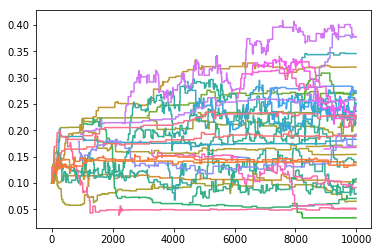

In [36]:
for i in range(1, len(all_types)):
    plt.plot(x, ys[i], c=c[i])

In [35]:
for y, n in zip(ys, all_types):
    if np.min(np.nan_to_num(y)) < 0:
        print(n)

*


In [125]:
[(n, np.min(np.nan_to_num(y))) for (n, y) in zip(all_types, ys)]

[('*', -0.06981580957179315),
 ('[#15]', 0.07093841320001645),
 ('[#15]~[#6]', -0.04196704531389079),
 ('[#16]', 0.1),
 ('[#16]~[#16]', 0.0),
 ('[#16]~[#17]', 0.0),
 ('[#16]~[#1]', 0.0),
 ('[#17]', 0.03492235134348588),
 ('[#1]', 0.1),
 ('[#35]', 0.1),
 ('[#53]', 0.1),
 ('[#6]', 0.1),
 ('[#6]~[#15]', 0.0),
 ('[#7]', 0.1),
 ('[#7]~[#16]', 0.0),
 ('[#7]~[#6]', 0.0),
 ('[#7]~[#6]~[#16]', 0.0),
 ('[#7]~[#6]~[#17]', 0.0),
 ('[#7]~[#6]~[#8]', 0.0),
 ('[#7]~[#6]~[#8]~[#6]', 0.0),
 ('[#8]', 0.1),
 ('[#9]', 0.1)]

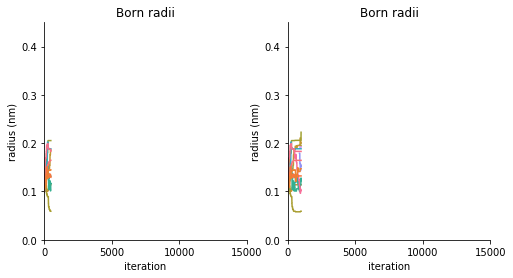

In [63]:
def plot_radii(ax, up_to_iteration=1000):
    
    for i in range(1, len(all_types)): # skip wildcard type
        ax.plot(x[:up_to_iteration], ys[i][:up_to_iteration], c=c[i])
    ax.set_xlim(0, len(traj))
    ax.set_ylim(0, np.max(np.nan_to_num(ys)) * 1.1)
    ax.set_xlabel('iteration')
    ax.set_ylabel('radius (nm)')
    
    ax.set_title('Born radii')

def prettify_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
plot_radii(ax, 500)
prettify_axes(ax)

ax = plt.subplot(1,2,2)
plot_radii(ax)
prettify_axes(ax)

In [62]:
np.max(np.nan_to_num(ys))

0.4091350306374333

In [39]:
node_color = [color_dict[n] for n in tree.G.nodes()]
import networkx as nx

In [40]:
layouts = [
    ('shell', nx.layout.shell_layout(tree.G)),
    ('fruchterman_reingold', nx.layout.fruchterman_reingold_layout(tree.G)),
    ('kamada_kawai', nx.layout.kamada_kawai_layout(tree.G)),
    ('spectral', nx.layout.spectral_layout(tree.G)),
    ('circular', nx.layout.circular_layout(tree.G)),
]

/Users/joshuafass/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


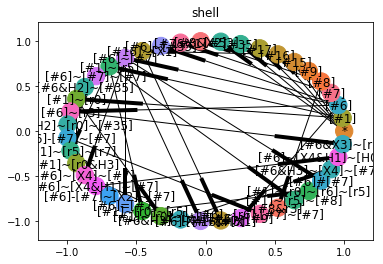

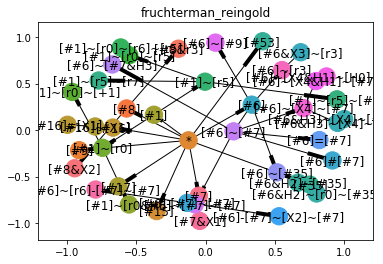

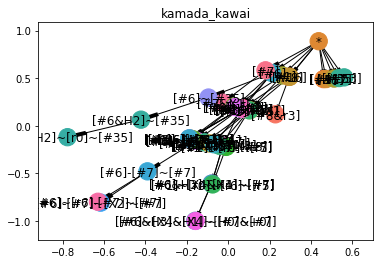

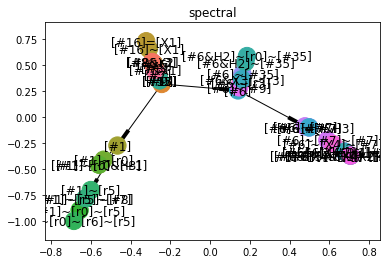

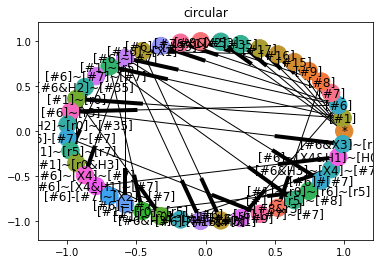

In [41]:
for name, pos in layouts:
    plt.figure()
    plt.title(name)
    nx.draw_networkx(tree.G, pos=pos, node_color=node_color, )

In [42]:
# none of these are what I want!

In [43]:
# let's just precompute sensible positions for all of the types

In [44]:
def depth(node):
    if node == '*':
        return 0
    return len(node.split('~'))

In [52]:
tree = traj[-1]

In [57]:
list(nx.depth_first_search.dfs_preorder_nodes(tree.G, '*'))

['*',
 '[#1]',
 '[#1]~[r5]',
 '[#1]~[r5]~[r7]',
 '[#1]~[r0]~[r5]',
 '[#1]~[r0]~[r6]~[r5]',
 '[#1]~[r5]~[#8]',
 '[#1]~[r0]',
 '[#1]~[r0&H3]',
 '[#1]~[r0]~[+1]',
 '[#6]',
 '[#6]~[#35]',
 '[#6&H2]~[#35]',
 '[#6&H2]~[r0]~[#35]',
 '[#6]~[#7]',
 '[#6]~[#7]~[#7]',
 '[#6]-[#7]~[#7]',
 '[#6]-[#7]~[X2]~[#7]',
 '[#6]~[r6]-[#7]~[#7]',
 '[#6]~[X4]~[#7]',
 '[#6]~[X4&H1]~[#7]',
 '[#6]~[X4&H1]~[H0]~[#7]',
 '[#6&H3]~[X4]~[#7]',
 '[#6&H3]~[X4]~[#7&+0]',
 '[#6]=[#7]',
 '[#6]~[#7&H3]',
 '[#6]#[#7]',
 '[#6]~[r3]',
 '[#6&X3]~[r3]',
 '[#6]~[#9]',
 '[#7]',
 '[#7&X1]',
 '[#8]',
 '[#8&X2]',
 '[#8&r3]',
 '[#9]',
 '[#15]',
 '[#16]',
 '[#16]~[X1]',
 '[#16]=[X1]',
 '[#17]',
 '[#35]',
 '[#53]']

In [80]:
from simtk import unit
def print_tree(tree):
    depth_dict = nx.shortest_path_length(tree.G, source='*')
    prefix = '|-'
    lines = []
    radii = []
    
    for n in nx.depth_first_search.dfs_preorder_nodes(tree.G, '*'):
        lines.append(prefix + '--'*depth_dict[n] + n)
        radii.append('(r = {:.5} nm)'.format(str(tree.get_radius(n) / unit.nanometer)))
    
    max_length = max(np.array(list(map(len, lines))) + np.array(list(map(len, radii))))
    width = max_length + 4
    for i in range(len(lines)):
        print(lines[i] + radii[i].rjust(width - len(lines[i])))

print_tree(traj[0])
print('\n')
print_tree(traj[-1])

|-*          (r = 0.1 nm)
|---[#1]     (r = 0.1 nm)
|---[#6]     (r = 0.1 nm)
|---[#7]     (r = 0.1 nm)
|---[#8]     (r = 0.1 nm)
|---[#9]     (r = 0.1 nm)
|---[#15]    (r = 0.1 nm)
|---[#16]    (r = 0.1 nm)
|---[#17]    (r = 0.1 nm)
|---[#35]    (r = 0.1 nm)
|---[#53]    (r = 0.1 nm)


|-*                                   (r = 0.212 nm)
|---[#1]                              (r = 0.192 nm)
|-----[#1]~[r5]                       (r = 0.089 nm)
|-------[#1]~[r5]~[r7]                (r = 0.094 nm)
|-------[#1]~[r0]~[r5]                (r = 0.034 nm)
|---------[#1]~[r0]~[r6]~[r5]         (r = 0.015 nm)
|-------[#1]~[r5]~[#8]                (r = 0.024 nm)
|-----[#1]~[r0]                       (r = 0.269 nm)
|-------[#1]~[r0&H3]                  (r = 0.185 nm)
|-------[#1]~[r0]~[+1]                (r = 0.268 nm)
|---[#6]                              (r = 0.192 nm)
|-----[#6]~[#35]                      (r = 0.191 nm)
|-------[#6&H2]~[#35]                 (r = 0.259 nm)
|---------[#6&H2]~[r0]~

In [140]:
def print_tree(tree, prefix='|-'):
    depth_dict = nx.shortest_path_length(tree.G, source='*')
    lines = []
    radii = []
    
    for i, n in enumerate(nx.depth_first_search.dfs_preorder_nodes(tree.G, '*')):
        if depth_dict[n] > 0:
            #lines.append('({})  '.format(i) + '  '*(depth_dict[n] - 1) + prefix + n)
            lines.append('  '*(depth_dict[n] - 1) + prefix + n)
        else:
            #lines.append('({})  '.format(i) + n)
            lines.append(n)
        radii.append('(r = {:.5} nm)'.format(str(tree.get_radius(n) / unit.nanometer)))
    
    max_length = max(np.array(list(map(len, lines))) + np.array(list(map(len, radii))))
    width = max_length + 4
    for i in range(len(lines)):
        print(lines[i] + radii[i].rjust(width - len(lines[i])))

print_tree(traj[0])
print('\n')
print_tree(traj[-1], '|-')

*          (r = 0.1 nm)
|-[#1]     (r = 0.1 nm)
|-[#6]     (r = 0.1 nm)
|-[#7]     (r = 0.1 nm)
|-[#8]     (r = 0.1 nm)
|-[#9]     (r = 0.1 nm)
|-[#15]    (r = 0.1 nm)
|-[#16]    (r = 0.1 nm)
|-[#17]    (r = 0.1 nm)
|-[#35]    (r = 0.1 nm)
|-[#53]    (r = 0.1 nm)


*                                   (r = 0.212 nm)
|-[#1]                              (r = 0.192 nm)
  |-[#1]~[r5]                       (r = 0.089 nm)
    |-[#1]~[r5]~[r7]                (r = 0.094 nm)
    |-[#1]~[r0]~[r5]                (r = 0.034 nm)
      |-[#1]~[r0]~[r6]~[r5]         (r = 0.015 nm)
    |-[#1]~[r5]~[#8]                (r = 0.024 nm)
  |-[#1]~[r0]                       (r = 0.269 nm)
    |-[#1]~[r0&H3]                  (r = 0.185 nm)
    |-[#1]~[r0]~[+1]                (r = 0.268 nm)
|-[#6]                              (r = 0.192 nm)
  |-[#6]~[#35]                      (r = 0.191 nm)
    |-[#6&H2]~[#35]                 (r = 0.259 nm)
      |-[#6&H2]~[r0]~[#35]          (r = 0.211 nm)
  |-[#6]~[#7]       

In [141]:
print_tree(traj[0])

*          (r = 0.1 nm)
|-[#1]     (r = 0.1 nm)
|-[#6]     (r = 0.1 nm)
|-[#7]     (r = 0.1 nm)
|-[#8]     (r = 0.1 nm)
|-[#9]     (r = 0.1 nm)
|-[#15]    (r = 0.1 nm)
|-[#16]    (r = 0.1 nm)
|-[#17]    (r = 0.1 nm)
|-[#35]    (r = 0.1 nm)
|-[#53]    (r = 0.1 nm)


In [151]:
print_tree(traj[80])

*          (r = 0.091 nm)
|-[#1]     (r = 0.135 nm)
|-[#6]     (r = 0.123 nm)
|-[#7]     (r = 0.160 nm)
|-[#8]     (r = 0.121 nm)
|-[#9]     (r = 0.107 nm)
|-[#15]    (r = 0.131 nm)
|-[#16]    (r = 0.116 nm)
|-[#17]    (r = 0.100 nm)
|-[#35]    (r = 0.115 nm)
|-[#53]    (r = 0.115 nm)


In [158]:
print_tree(traj[-1])

*                                   (r = 0.212 nm)
|-[#1]                              (r = 0.192 nm)
  |-[#1]~[r5]                       (r = 0.089 nm)
    |-[#1]~[r5]~[r7]                (r = 0.094 nm)
    |-[#1]~[r0]~[r5]                (r = 0.034 nm)
      |-[#1]~[r0]~[r6]~[r5]         (r = 0.015 nm)
    |-[#1]~[r5]~[#8]                (r = 0.024 nm)
  |-[#1]~[r0]                       (r = 0.269 nm)
    |-[#1]~[r0&H3]                  (r = 0.185 nm)
    |-[#1]~[r0]~[+1]                (r = 0.268 nm)
|-[#6]                              (r = 0.192 nm)
  |-[#6]~[#35]                      (r = 0.191 nm)
    |-[#6&H2]~[#35]                 (r = 0.259 nm)
      |-[#6&H2]~[r0]~[#35]          (r = 0.211 nm)
  |-[#6]~[#7]                       (r = 0.258 nm)
    |-[#6]~[#7]~[#7]                (r = 0.317 nm)
      |-[#6]-[#7]~[#7]              (r = 0.237 nm)
        |-[#6]-[#7]~[X2]~[#7]       (r = 0.109 nm)
        |-[#6]~[r6]-[#7]~[#7]       (r = 0.111 nm)
    |-[#6]~[X4]~[#7]           

In [160]:
list(traj[-1].G.edges())

[('*', '[#1]'),
 ('*', '[#6]'),
 ('*', '[#7]'),
 ('*', '[#8]'),
 ('*', '[#9]'),
 ('*', '[#15]'),
 ('*', '[#16]'),
 ('*', '[#17]'),
 ('*', '[#35]'),
 ('*', '[#53]'),
 ('[#1]', '[#1]'),
 ('[#1]', '[#1]~[r5]'),
 ('[#1]', '[#1]~[r0]'),
 ('[#6]', '[#6]~[#35]'),
 ('[#6]', '[#6]~[#7]'),
 ('[#6]', '[#6]~[r3]'),
 ('[#6]', '[#6]'),
 ('[#6]', '[#6]~[#9]'),
 ('[#7]', '[#7]'),
 ('[#7]', '[#7&X1]'),
 ('[#8]', '[#8&X2]'),
 ('[#8]', '[#8]'),
 ('[#8]', '[#8&r3]'),
 ('[#9]', '[#9]'),
 ('[#15]', '[#15]'),
 ('[#16]', '[#16]'),
 ('[#16]', '[#16]~[X1]'),
 ('[#17]', '[#17]'),
 ('[#35]', '[#35]'),
 ('[#53]', '[#53]'),
 ('[#8&X2]', '[#8&X2]'),
 ('[#7&X1]', '[#7&X1]'),
 ('[#6]~[#35]', '[#6&H2]~[#35]'),
 ('[#16]~[X1]', '[#16]=[X1]'),
 ('[#6]~[#7]', '[#6]~[#7]~[#7]'),
 ('[#6]~[#7]', '[#6]~[X4]~[#7]'),
 ('[#6]~[#7]', '[#6]=[#7]'),
 ('[#6]~[#7]', '[#6]~[#7&H3]'),
 ('[#6]~[#7]', '[#6]#[#7]'),
 ('[#1]~[r5]', '[#1]~[r5]~[r7]'),
 ('[#1]~[r5]', '[#1]~[r0]~[r5]'),
 ('[#1]~[r5]', '[#1]~[r5]~[#8]'),
 ('[#6]~[#7]~[#7]', '[#

In [166]:
t = traj[-1]
radii = dict([(n, t.get_radius(n) / unit.nanometer) for n in t.ordered_nodes])
radii

{'*': 0.21204029233518257,
 '[#15]': 0.10048691343110142,
 '[#16]': 0.2956471088262678,
 '[#16]=[X1]': 0.170464133119591,
 '[#16]~[X1]': 0.1654138959921596,
 '[#17]': 0.04812616788986696,
 '[#1]': 0.19255654706772168,
 '[#1]~[r0&H3]': 0.18514892997588633,
 '[#1]~[r0]': 0.26902580427193323,
 '[#1]~[r0]~[+1]': 0.26831095654017695,
 '[#1]~[r0]~[r5]': 0.03424533340123472,
 '[#1]~[r0]~[r6]~[r5]': 0.015010858530060268,
 '[#1]~[r5]': 0.08968460303956263,
 '[#1]~[r5]~[#8]': 0.024347861772669524,
 '[#1]~[r5]~[r7]': 0.09482663089146491,
 '[#35]': 0.1377587651159384,
 '[#53]': 0.11147909994557957,
 '[#6&H2]~[#35]': 0.25993334791673905,
 '[#6&H2]~[r0]~[#35]': 0.2116828935843233,
 '[#6&H3]~[X4]~[#7&+0]': 0.3589802370098356,
 '[#6&H3]~[X4]~[#7]': 0.26012982914689614,
 '[#6&X3]~[r3]': 0.10946385081525419,
 '[#6]': 0.19224124016953614,
 '[#6]#[#7]': 0.19521032952434852,
 '[#6]-[#7]~[#7]': 0.23792087346181343,
 '[#6]-[#7]~[X2]~[#7]': 0.10990391093298779,
 '[#6]=[#7]': 0.05950333563178481,
 '[#6]~[#35]'

In [ ]:
edges = list(traj[-1].G.edges())

In [143]:
print_tree(traj[100])

*              (r = 0.091 nm)
|-[#1]         (r = 0.157 nm)
|-[#6]         (r = 0.123 nm)
|-[#7]         (r = 0.169 nm)
|-[#8]         (r = 0.123 nm)
  |-[#8&X2]    (r = 0.127 nm)
|-[#9]         (r = 0.108 nm)
|-[#15]        (r = 0.140 nm)
|-[#16]        (r = 0.126 nm)
|-[#17]        (r = 0.112 nm)
|-[#35]        (r = 0.115 nm)
|-[#53]        (r = 0.115 nm)


In [142]:
print_tree(traj[1000])

*                 (r = 0.042 nm)
|-[#1]            (r = 0.222 nm)
|-[#6]            (r = 0.188 nm)
  |-[#6]~[#35]    (r = 0.152 nm)
  |-[#6]~[#7]     (r = 0.192 nm)
|-[#7]            (r = 0.182 nm)
  |-[#7&X1]       (r = 0.101 nm)
|-[#8]            (r = 0.132 nm)
  |-[#8&X2]       (r = 0.164 nm)
|-[#9]            (r = 0.147 nm)
|-[#15]           (r = 0.113 nm)
|-[#16]           (r = 0.199 nm)
  |-[#16]~[X1]    (r = 0.194 nm)
|-[#17]           (r = 0.059 nm)
|-[#35]           (r = 0.124 nm)
|-[#53]           (r = 0.125 nm)


In [99]:
def node_positions(tree):
    depth_dict = nx.shortest_path_length(tree.G, source='*')
    height_dict = dict(zip(nx.depth_first_search.dfs_preorder_nodes(tree.G, '*'), range(tree.number_of_nodes)))
    pos_dict = dict()
    for n in tree.ordered_nodes:
        pos_dict[n] = (depth_dict[n], height_dict[n])
    return pos_dict

In [ ]:
str.rjust()

{'*': 0,
 '[#15]': 1,
 '[#16]': 1,
 '[#16]=[X1]': 3,
 '[#16]~[X1]': 2,
 '[#17]': 1,
 '[#1]': 1,
 '[#1]~[r0&H3]': 3,
 '[#1]~[r0]': 2,
 '[#1]~[r0]~[+1]': 3,
 '[#1]~[r0]~[r5]': 3,
 '[#1]~[r0]~[r6]~[r5]': 4,
 '[#1]~[r5]': 2,
 '[#1]~[r5]~[#8]': 3,
 '[#1]~[r5]~[r7]': 3,
 '[#35]': 1,
 '[#53]': 1,
 '[#6&H2]~[#35]': 3,
 '[#6&H2]~[r0]~[#35]': 4,
 '[#6&H3]~[X4]~[#7&+0]': 5,
 '[#6&H3]~[X4]~[#7]': 4,
 '[#6&X3]~[r3]': 3,
 '[#6]': 1,
 '[#6]#[#7]': 3,
 '[#6]-[#7]~[#7]': 4,
 '[#6]-[#7]~[X2]~[#7]': 5,
 '[#6]=[#7]': 3,
 '[#6]~[#35]': 2,
 '[#6]~[#7&H3]': 3,
 '[#6]~[#7]': 2,
 '[#6]~[#7]~[#7]': 3,
 '[#6]~[#9]': 2,
 '[#6]~[X4&H1]~[#7]': 4,
 '[#6]~[X4&H1]~[H0]~[#7]': 5,
 '[#6]~[X4]~[#7]': 3,
 '[#6]~[r3]': 2,
 '[#6]~[r6]-[#7]~[#7]': 5,
 '[#7&X1]': 2,
 '[#7]': 1,
 '[#8&X2]': 2,
 '[#8&r3]': 2,
 '[#8]': 1,
 '[#9]': 1}

In [68]:
print(tree.get_radius('*'))

0.21204029233518257 nm


In [60]:
' '*10 + 'blah'

'          blah'

In [53]:
print(tree)

parent --> child
	* --> [#1]
	* --> [#6]
	* --> [#7]
	* --> [#8]
	* --> [#9]
	* --> [#15]
	* --> [#16]
	* --> [#17]
	* --> [#35]
	* --> [#53]
	[#1] --> [#1]
	[#1] --> [#1]~[r5]
	[#1] --> [#1]~[r0]
	[#6] --> [#6]~[#35]
	[#6] --> [#6]~[#7]
	[#6] --> [#6]~[r3]
	[#6] --> [#6]
	[#6] --> [#6]~[#9]
	[#7] --> [#7]
	[#7] --> [#7&X1]
	[#8] --> [#8&X2]
	[#8] --> [#8]
	[#8] --> [#8&r3]
	[#9] --> [#9]
	[#15] --> [#15]
	[#16] --> [#16]
	[#16] --> [#16]~[X1]
	[#17] --> [#17]
	[#35] --> [#35]
	[#53] --> [#53]
	[#8&X2] --> [#8&X2]
	[#7&X1] --> [#7&X1]
	[#6]~[#35] --> [#6&H2]~[#35]
	[#16]~[X1] --> [#16]=[X1]
	[#6]~[#7] --> [#6]~[#7]~[#7]
	[#6]~[#7] --> [#6]~[X4]~[#7]
	[#6]~[#7] --> [#6]=[#7]
	[#6]~[#7] --> [#6]~[#7&H3]
	[#6]~[#7] --> [#6]#[#7]
	[#1]~[r5] --> [#1]~[r5]~[r7]
	[#1]~[r5] --> [#1]~[r0]~[r5]
	[#1]~[r5] --> [#1]~[r5]~[#8]
	[#6]~[#7]~[#7] --> [#6]-[#7]~[#7]
	[#6&H2]~[#35] --> [#6&H2]~[r0]~[#35]
	[#1]~[r0] --> [#1]~[r0&H3]
	[#1]~[r0] --> [#1]~[r0]~[+1]
	[#6]~[r3] --> [#6&X3]~[r3]
	[#6]-[#7]~[#7]

In [45]:
depth_dict = dict(zip(all_types, map(depth, all_types)))

In [46]:
depth_dict

{'*': 0,
 '[#15]': 1,
 '[#15]~[X4]': 2,
 '[#16]': 1,
 '[#16]=[X1]': 1,
 '[#16]~[X1]': 2,
 '[#17]': 1,
 '[#1]': 1,
 '[#1]~[#16]': 2,
 '[#1]~[r0&H3]': 2,
 '[#1]~[r0&H3]~[#9]': 3,
 '[#1]~[r0]': 2,
 '[#1]~[r0]~[+1]': 3,
 '[#1]~[r0]~[r5]': 3,
 '[#1]~[r0]~[r6]~[r5]': 4,
 '[#1]~[r5]': 2,
 '[#1]~[r5]~[#8]': 3,
 '[#1]~[r5]~[r7]': 3,
 '[#35]': 1,
 '[#53]': 1,
 '[#6&H2]~[#35]': 2,
 '[#6&H2]~[r0]~[#35]': 3,
 '[#6&H3]~[#35]': 2,
 '[#6&H3]~[X4]~[#7&+0]': 3,
 '[#6&H3]~[X4]~[#7]': 3,
 '[#6&X3]~[r3]': 2,
 '[#6]': 1,
 '[#6]#[#7]': 1,
 '[#6]-[#7]~[#7]': 2,
 '[#6]-[#7]~[#7]~[X3]': 3,
 '[#6]-[#7]~[X2]~[#7]': 3,
 '[#6]=[#7]': 1,
 '[#6]@[r3]': 1,
 '[#6]~[#35]': 2,
 '[#6]~[#53]': 2,
 '[#6]~[#7&H3]': 2,
 '[#6]~[#7]': 2,
 '[#6]~[#7]~[#7]': 3,
 '[#6]~[#9]': 2,
 '[#6]~[X4&H1]~[#7]': 3,
 '[#6]~[X4&H1]~[H0]~[#7]': 4,
 '[#6]~[X4]~[#7]': 3,
 '[#6]~[X4]~[X4&H1]~[#7]': 4,
 '[#6]~[r3]': 2,
 '[#6]~[r3]~[X2]': 3,
 '[#6]~[r6]-[#7]~[#7]': 3,
 '[#7&X1]': 1,
 '[#7]': 1,
 '[#8&X2]': 1,
 '[#8&r3]': 1,
 '[#8]': 1,
 '[#9]': 1}

In [47]:
height_dict = dict(zip(all_types, 0.3 * np.arange(len(all_types))))
height_dict

{'*': 0.0,
 '[#15]': 0.3,
 '[#15]~[X4]': 0.6,
 '[#16]': 0.8999999999999999,
 '[#16]=[X1]': 1.2,
 '[#16]~[X1]': 1.5,
 '[#17]': 1.7999999999999998,
 '[#1]': 2.1,
 '[#1]~[#16]': 2.4,
 '[#1]~[r0&H3]': 2.6999999999999997,
 '[#1]~[r0&H3]~[#9]': 3.0,
 '[#1]~[r0]': 3.3,
 '[#1]~[r0]~[+1]': 3.5999999999999996,
 '[#1]~[r0]~[r5]': 3.9,
 '[#1]~[r0]~[r6]~[r5]': 4.2,
 '[#1]~[r5]': 4.5,
 '[#1]~[r5]~[#8]': 4.8,
 '[#1]~[r5]~[r7]': 5.1,
 '[#35]': 5.3999999999999995,
 '[#53]': 5.7,
 '[#6&H2]~[#35]': 6.0,
 '[#6&H2]~[r0]~[#35]': 6.3,
 '[#6&H3]~[#35]': 6.6,
 '[#6&H3]~[X4]~[#7&+0]': 6.8999999999999995,
 '[#6&H3]~[X4]~[#7]': 7.199999999999999,
 '[#6&X3]~[r3]': 7.5,
 '[#6]': 7.8,
 '[#6]#[#7]': 8.1,
 '[#6]-[#7]~[#7]': 8.4,
 '[#6]-[#7]~[#7]~[X3]': 8.7,
 '[#6]-[#7]~[X2]~[#7]': 9.0,
 '[#6]=[#7]': 9.299999999999999,
 '[#6]@[r3]': 9.6,
 '[#6]~[#35]': 9.9,
 '[#6]~[#53]': 10.2,
 '[#6]~[#7&H3]': 10.5,
 '[#6]~[#7]': 10.799999999999999,
 '[#6]~[#7]~[#7]': 11.1,
 '[#6]~[#9]': 11.4,
 '[#6]~[X4&H1]~[#7]': 11.7,
 '[#6]~[X4&H1

In [48]:
max(height_dict.values())

15.299999999999999

In [49]:
pos_dict = dict(zip(all_types, [(depth_dict[t], height_dict[t]) for t in all_types]))
pos_dict

{'*': (0, 0.0),
 '[#15]': (1, 0.3),
 '[#15]~[X4]': (2, 0.6),
 '[#16]': (1, 0.8999999999999999),
 '[#16]=[X1]': (1, 1.2),
 '[#16]~[X1]': (2, 1.5),
 '[#17]': (1, 1.7999999999999998),
 '[#1]': (1, 2.1),
 '[#1]~[#16]': (2, 2.4),
 '[#1]~[r0&H3]': (2, 2.6999999999999997),
 '[#1]~[r0&H3]~[#9]': (3, 3.0),
 '[#1]~[r0]': (2, 3.3),
 '[#1]~[r0]~[+1]': (3, 3.5999999999999996),
 '[#1]~[r0]~[r5]': (3, 3.9),
 '[#1]~[r0]~[r6]~[r5]': (4, 4.2),
 '[#1]~[r5]': (2, 4.5),
 '[#1]~[r5]~[#8]': (3, 4.8),
 '[#1]~[r5]~[r7]': (3, 5.1),
 '[#35]': (1, 5.3999999999999995),
 '[#53]': (1, 5.7),
 '[#6&H2]~[#35]': (2, 6.0),
 '[#6&H2]~[r0]~[#35]': (3, 6.3),
 '[#6&H3]~[#35]': (2, 6.6),
 '[#6&H3]~[X4]~[#7&+0]': (3, 6.8999999999999995),
 '[#6&H3]~[X4]~[#7]': (3, 7.199999999999999),
 '[#6&X3]~[r3]': (2, 7.5),
 '[#6]': (1, 7.8),
 '[#6]#[#7]': (1, 8.1),
 '[#6]-[#7]~[#7]': (2, 8.4),
 '[#6]-[#7]~[#7]~[X3]': (3, 8.7),
 '[#6]-[#7]~[X2]~[#7]': (3, 9.0),
 '[#6]=[#7]': (1, 9.299999999999999),
 '[#6]@[r3]': (1, 9.6),
 '[#6]~[#35]': (2, 

/Users/joshuafass/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


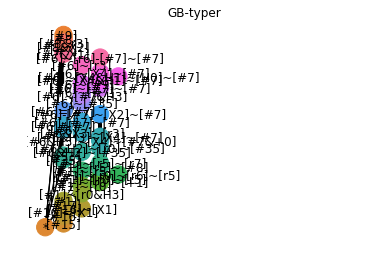

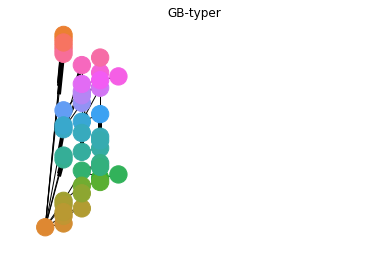

In [51]:
def draw_typing_tree(tree, with_labels=True):
    node_color = [color_dict[n] for n in tree.G.nodes()]
    nx.draw_networkx(tree.G, pos=pos_dict, node_color=node_color, with_labels=with_labels)
    plt.xlim(-1,max(height_dict.values()) + 2)
    plt.ylim(-1,max(height_dict.values()) + 1)
    #plt.xticks([])
    #plt.yticks([])
    plt.axis('off')
    plt.title('GB-typer')
draw_typing_tree(traj[-1])
plt.figure()
draw_typing_tree(traj[-1], with_labels=False)

In [ ]:
def draw_typing_tree(tree):
    node_color = [color_dict[n] for n in tree.G.nodes()]
    nx.draw_networkx(tree.G, pos=pos_dict, node_color=node_color, )
    plt.xlim(-1,max(height_dict.values()) + 2)
    plt.ylim(-1,max(height_dict.values()) + 1)
    #plt.xticks([])
    #plt.yticks([])
    plt.axis('off')
    plt.title('GB-typer')

In [53]:
def plot_summary(t=1000):
    plt.figure(figsize=(8,8))
    
    # 1. current tree
    ax = plt.subplot(2,2,1)
    tree = traj[t]
    draw_typing_tree(tree)
    
    # 2. radii
    ax = plt.subplot(2,2,2)
    plot_radii(ax, t)
    prettify_axes(ax)

    # 3. log probability
    ax = plt.subplot(2,2,3)
    plot_log_prob(t)
    prettify_axes(ax)
    
    
    # 4. marginal # GB types
    ax = plt.subplot(2,2,4)
    plot_running_average_model_evidence(t)
    prettify_axes(ax)
    
    # (# types trajectory?)
    
    plt.tight_layout()

/Users/joshuafass/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


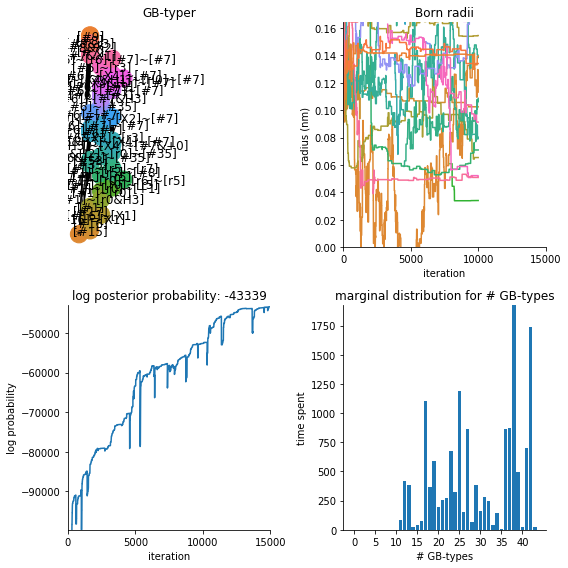

In [58]:
plot_summary(len(traj) - 1)

In [102]:
len(traj)

5001

/Users/joshuafass/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


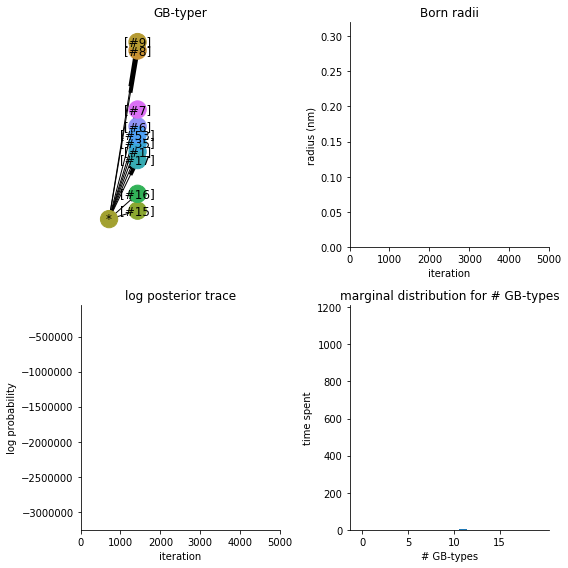

In [93]:
plot_summary(2)

In [64]:
from tqdm import tqdm

t_s = range(2, len(traj))[::50]
for t in tqdm(t_s):
    plot_summary(t)
    plt.savefig('elaborate_typing_animation/{:03}.png'.format(t))
    plt.close()


  0%|          | 0/300 [00:00<?, ?it/s]/Users/joshuafass/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):

100%|██████████| 300/300 [03:43<00:00,  1.34it/s]


Add subplots for "train" / "test" solvation free energy predictions?

In [128]:
import mdtraj as md
import numpy as np
from pkg_resources import resource_filename
from tqdm import tqdm

from bayes_implicit_solvent.posterior_sampling import Molecule
from bayes_implicit_solvent.smarts import atomic_number_dict
from bayes_implicit_solvent.solvation_free_energy import smiles_list
from bayes_implicit_solvent.typers import GBTypingTree
from bayes_implicit_solvent.utils import mdtraj_to_list_of_unitted_snapshots

data_path = '../data/'

np.random.seed(0)
train_mols = []

N_train = 481

smiles_subset = list(smiles_list)
np.random.shuffle(smiles_subset)
train_smiles_subset = smiles_subset[:N_train]
print('looking at only {} entries from FreeSolv'.format(len(train_smiles_subset)))
n_configuration_samples = 10

for smiles in train_smiles_subset:
    mol = Molecule(smiles, vacuum_samples=[])
    path_to_vacuum_samples = resource_filename('bayes_implicit_solvent',
                                               'vacuum_samples/vacuum_samples_{}.h5'.format(
                                                   mol.mol_index_in_smiles_list))
    vacuum_traj = md.load(path_to_vacuum_samples)
    thinning = int(len(vacuum_traj) / n_configuration_samples)
    mol.vacuum_traj = mdtraj_to_list_of_unitted_snapshots(vacuum_traj[::thinning])
    #print('thinned vacuum_traj from {} to {}'.format(len(vacuum_traj), len(mol.vacuum_traj)))
    train_mols.append(mol)

looking at only 481 entries from FreeSolv


In [ ]:
all_mols

In [113]:
# let's get the number of matches for each one of these patterns

from bayes_implicit_solvent.typers import FlatGBTyper
all_typer = FlatGBTyper(all_types)
matches = [all_typer.get_matches(m.mol) for m in train_mols]

In [114]:
all_typer.smarts_list

['*',
 '[#15]',
 '[#15]~[X4]',
 '[#16]',
 '[#16]=[X1]',
 '[#16]~[X1]',
 '[#17]',
 '[#1]',
 '[#1]~[#16]',
 '[#1]~[r0&H3]',
 '[#1]~[r0&H3]~[#9]',
 '[#1]~[r0]',
 '[#1]~[r0]~[+1]',
 '[#1]~[r0]~[r5]',
 '[#1]~[r0]~[r6]~[r5]',
 '[#1]~[r5]',
 '[#1]~[r5]~[#8]',
 '[#1]~[r5]~[r7]',
 '[#35]',
 '[#53]',
 '[#6&H2]~[#35]',
 '[#6&H2]~[r0]~[#35]',
 '[#6&H3]~[#35]',
 '[#6&H3]~[X4]~[#7&+0]',
 '[#6&H3]~[X4]~[#7]',
 '[#6&X3]~[r3]',
 '[#6]',
 '[#6]#[#7]',
 '[#6]-[#7]~[#7]',
 '[#6]-[#7]~[#7]~[X3]',
 '[#6]-[#7]~[X2]~[#7]',
 '[#6]=[#7]',
 '[#6]@[r3]',
 '[#6]~[#35]',
 '[#6]~[#53]',
 '[#6]~[#7&H3]',
 '[#6]~[#7]',
 '[#6]~[#7]~[#7]',
 '[#6]~[#9]',
 '[#6]~[X4&H1]~[#7]',
 '[#6]~[X4&H1]~[H0]~[#7]',
 '[#6]~[X4]~[#7]',
 '[#6]~[X4]~[X4&H1]~[#7]',
 '[#6]~[r3]',
 '[#6]~[r3]~[X2]',
 '[#6]~[r6]-[#7]~[#7]',
 '[#7&X1]',
 '[#7]',
 '[#8&X2]',
 '[#8&r3]',
 '[#8]',
 '[#9]']

In [115]:
hits = sum([m.sum(0) for m in matches])
hits

array([8679,   12,    0,   41,    6,   11,  233, 4541,    5, 1878,    3,
       3370,   69,   29,    3,  121,    7,    2,   22,   12,    9,    7,
          1,   12,   24,    2, 3097,   10,    1,    1,    0,    1,   13,
         20,   11,    8,  266,    3,   28,   11,   12,   63,    2,   16,
          4,    2,   10,  178,  250,    1,  482,   61])

In [132]:
inds = [i for i in range(len(all_types)) if all_types[i] == '[#7&X1]']
inds

[46]

In [133]:
ind = inds[0]

In [134]:
matches[0].shape

(26, 52)

In [135]:
len(smiles_list), len(smiles_subset), len(matches)

(642, 642, 481)

In [136]:
[(i, train_smiles_subset[i]) for i in range(len(train_smiles_subset)) if (matches[i][:,ind].sum() > 0)]

[(86, 'CCCCC#N'),
 (130, 'c1cnccc1C#N'),
 (140, 'c1cc(cnc1)C#N'),
 (148, 'COC(CC#N)(OC)OC'),
 (227, 'CC#N'),
 (323, 'CCCC#N'),
 (417, 'c1cc(c(c(c1)Cl)C#N)Cl'),
 (429, 'COC(=O)CC#N'),
 (450, 'c1ccc(cc1)C#N'),
 (471, 'c1cc(cc(c1)O)C#N')]

In [138]:
print([train_smiles_subset[i] for i in range(len(train_smiles_subset)) if (matches[i][:,ind].sum() > 0)])

['CCCCC#N', 'c1cnccc1C#N', 'c1cc(cnc1)C#N', 'COC(CC#N)(OC)OC', 'CC#N', 'CCCC#N', 'c1cc(c(c(c1)Cl)C#N)Cl', 'COC(=O)CC#N', 'c1ccc(cc1)C#N', 'c1cc(cc(c1)O)C#N']


In [127]:
[train_smiles_subset[i] for i in range(len(train_smiles_subset)) if (ind in all_typer.get_gb_types(train_mols[i].mol))]

[]

In [35]:
sorted(zip(all_typer.smarts_list, hits), key=lambda e: -e[1])

[('*', 8679),
 ('[#1]', 4541),
 ('[#1]~[r0]', 3370),
 ('[#6]', 3097),
 ('[#1]~[r0&H3]', 1878),
 ('[#8]', 482),
 ('[#6]~[#7]', 266),
 ('[#8&X2]', 250),
 ('[#17]', 233),
 ('[#7]', 178),
 ('[#1]~[r5]', 121),
 ('[#1]~[r0]~[+1]', 69),
 ('[#6]~[X4]~[#7]', 63),
 ('[#9]', 61),
 ('[#16]', 41),
 ('[#1]~[r0]~[r5]', 29),
 ('[#6]~[#9]', 28),
 ('[#6&H3]~[X4]~[#7]', 24),
 ('[#35]', 22),
 ('[#6]~[#35]', 20),
 ('[#6]~[r3]', 16),
 ('[#6]@[r3]', 13),
 ('[#15]', 12),
 ('[#53]', 12),
 ('[#6&H3]~[X4]~[#7&+0]', 12),
 ('[#6]~[X4&H1]~[H0]~[#7]', 12),
 ('[#16]~[X1]', 11),
 ('[#6]~[#53]', 11),
 ('[#6]~[X4&H1]~[#7]', 11),
 ('[#6]#[#7]', 10),
 ('[#7&X1]', 10),
 ('[#6&H2]~[#35]', 9),
 ('[#6]~[#7&H3]', 8),
 ('[#1]~[r5]~[#8]', 7),
 ('[#6&H2]~[r0]~[#35]', 7),
 ('[#16]=[X1]', 6),
 ('[#1]~[#16]', 5),
 ('[#6]~[r3]~[X2]', 4),
 ('[#1]~[r0&H3]~[#9]', 3),
 ('[#1]~[r0]~[r6]~[r5]', 3),
 ('[#6]~[#7]~[#7]', 3),
 ('[#1]~[r5]~[r7]', 2),
 ('[#6&X3]~[r3]', 2),
 ('[#6]~[X4]~[X4&H1]~[#7]', 2),
 ('[#6]~[r6]-[#7]~[#7]', 2),
 ('[#6&H3]~[

In [36]:
[s for s in all_typer.smarts_list if '[#1]' in s]

['[#1]',
 '[#1]~[#16]',
 '[#1]~[r0&H3]',
 '[#1]~[r0&H3]~[#9]',
 '[#1]~[r0]',
 '[#1]~[r0]~[+1]',
 '[#1]~[r0]~[r5]',
 '[#1]~[r0]~[r6]~[r5]',
 '[#1]~[r5]',
 '[#1]~[r5]~[#8]',
 '[#1]~[r5]~[r7]']

In [129]:
import mdtraj as md
import numpy as np
from pkg_resources import resource_filename
from tqdm import tqdm

from bayes_implicit_solvent.posterior_sampling import Molecule
from bayes_implicit_solvent.smarts import atomic_number_dict
from bayes_implicit_solvent.solvation_free_energy import smiles_list
from bayes_implicit_solvent.typers import GBTypingTree
from bayes_implicit_solvent.utils import mdtraj_to_list_of_unitted_snapshots

data_path = '../data/'

np.random.seed(0)
all_mols = []

smiles_subset = list(smiles_list)
n_configuration_samples = 10

for smiles in smiles_subset:
    mol = Molecule(smiles, vacuum_samples=[])
    path_to_vacuum_samples = resource_filename('bayes_implicit_solvent',
                                               'vacuum_samples/vacuum_samples_{}.h5'.format(
                                                   mol.mol_index_in_smiles_list))
    vacuum_traj = md.load(path_to_vacuum_samples)
    thinning = int(len(vacuum_traj) / n_configuration_samples)
    mol.vacuum_traj = mdtraj_to_list_of_unitted_snapshots(vacuum_traj[::thinning])
    #print('thinned vacuum_traj from {} to {}'.format(len(vacuum_traj), len(mol.vacuum_traj)))
    all_mols.append(mol)

In [130]:
typer = traj[-1]

In [131]:
[i for i in typer.ordered_nodes

['*',
 '[#1]',
 '[#6]',
 '[#7]',
 '[#8]',
 '[#9]',
 '[#15]',
 '[#16]',
 '[#17]',
 '[#35]',
 '[#53]',
 '[#1]~[r5]',
 '[#1]~[r0]',
 '[#6]~[#35]',
 '[#6]~[#7]',
 '[#6]~[r3]',
 '[#6]~[#9]',
 '[#7&X1]',
 '[#8&X2]',
 '[#8&r3]',
 '[#16]~[X1]',
 '[#1]~[r5]~[r7]',
 '[#1]~[r0]~[r5]',
 '[#1]~[r5]~[#8]',
 '[#1]~[r0&H3]',
 '[#1]~[r0]~[+1]',
 '[#6&H2]~[#35]',
 '[#6]~[#7]~[#7]',
 '[#6]~[X4]~[#7]',
 '[#6]=[#7]',
 '[#6]~[#7&H3]',
 '[#6]#[#7]',
 '[#6&X3]~[r3]',
 '[#16]=[X1]',
 '[#1]~[r0]~[r6]~[r5]',
 '[#6&H2]~[r0]~[#35]',
 '[#6]-[#7]~[#7]',
 '[#6]~[X4&H1]~[#7]',
 '[#6&H3]~[X4]~[#7]',
 '[#6]-[#7]~[X2]~[#7]',
 '[#6]~[r6]-[#7]~[#7]',
 '[#6]~[X4&H1]~[H0]~[#7]',
 '[#6&H3]~[X4]~[#7&+0]']

In [66]:
test_smiles_subset = smiles_subset[N_train:]
test_mols = []
for smiles in test_smiles_subset:
    mol = Molecule(smiles, vacuum_samples=[])
    path_to_vacuum_samples = resource_filename('bayes_implicit_solvent',
                                               'vacuum_samples/vacuum_samples_{}.h5'.format(
                                                   mol.mol_index_in_smiles_list))
    vacuum_traj = md.load(path_to_vacuum_samples)
    thinning = int(len(vacuum_traj) / n_configuration_samples)
    mol.vacuum_traj = mdtraj_to_list_of_unitted_snapshots(vacuum_traj[::thinning])
    #print('thinned vacuum_traj from {} to {}'.format(len(vacuum_traj), len(mol.vacuum_traj)))
    test_mols.append(mol)

In [67]:
experiment_train = [mol.experimental_value for mol in train_mols]
experiment_unc_train = [mol.experimental_uncertainty for mol in train_mols]

In [68]:
def get_train_predictions(tree):
    return [mol.predict_solvation_free_energy(tree.assign_radii(mol.mol)) for mol in train_mols]
def get_test_predictions(tree):
    return [mol.predict_solvation_free_energy(tree.assign_radii(mol.mol)) for mol in test_mols]

In [ ]:
train_predictions = []
for t in tqdm(t_s):
    tree = traj[t]
    train_predictions.append(get_train_predictions(tree))


 37%|███▋      | 110/300 [05:44<09:55,  3.14s/it]

In [ ]:
test_predictions = []
for t in tqdm(range(2, len(traj))[::10]):
    tree = traj[t]
    test_predictions.append(get_test_predictions(tree))

In [ ]:
y_ = [[p[0] for p in pred] for pred in train_predictions]
y_unc = [[p[1] for p in pred] for pred in train_predictions]

In [ ]:
plt.errorbar(x=experiment_train, xerr=experiment_unc_train, y=y_[-1], yerr=y_unc[-1], fmt='none')

plt.plot(sorted(experiment), sorted(experiment), color='grey')

plt.xlabel('experiment')
plt.ylabel('prediction')

In [ ]:
plt.errorbar(x=experiment, xerr=experiment_unc, y=y_[-1], yerr=y_unc[-1], fmt='none')

plt.plot(sorted(experiment), sorted(experiment), color='grey')

plt.ylim(min(experiment), max(experiment))
plt.xlabel('experiment')
plt.ylabel('prediction')

In [ ]:
plt.errorbar(x=experiment, xerr=experiment_unc, y=y_[0], yerr=y_unc[0], fmt='none')

plt.plot(sorted(experiment), sorted(experiment), color='grey')

#plt.ylim(min(experiment), max(experiment))
plt.xlabel('experiment')
plt.ylabel('prediction')

In [ ]:
for pred in predictions[::10]:
    plt.figure()
    plt.scatter(experiment, pred)